<a href="https://colab.research.google.com/github/Erenkyz/Sentiment_Analysis-Iphone17-/blob/main/Sentiment_Analysis(Iphone17).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# 1. Install the necessary libraries

!pip install transformers torch pandas tqdm --quiet


# 2. Import the necessary modules

import pandas as pd
from transformers import pipeline
from tqdm.notebook import tqdm


# 3. Upload the CSV file

df = pd.read_csv("reddit_iphone17_comments.csv.csv")

# If the column name is different, check:
print(df.columns)

# For example, we will use the ‘comment_body’ column:
df = df.dropna(subset=['comment_body'])  # boş değerleri temizle
df['comment_body'] = df['comment_body'].astype(str)

print(f"Toplam yorum sayısı: {len(df)}")


#  4. Load the sentiment analysis model

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",
    truncation=True,
    batch_size=32,
    device=0
)


# 5. Analyze comments in batches

batch_size = 100
results = []

for i in tqdm(range(0, len(df), batch_size), desc="Sentiment analysis progress"):
    batch = df['comment_body'][i:i+batch_size].tolist()
    try:
        batch_results = sentiment_pipeline(batch)
        results.extend(batch_results)
    except Exception as e:
        print(f"Batch {i}-{i+batch_size} Error: {e}")


# 6. Add the results to the DataFrame

df['sentiment_label'] = [r['label'] for r in results]
df['sentiment_score'] = [r['score'] for r in results]


#  7. Save the results

output_path = "reddit_sentiment_results.csv"
df.to_csv(output_path, index=False)
print(f"Sentiment analysis completed! Results: {output_path}")


# 📊 8. View sample output

df.head(10)


Index(['comment_id', 'comment_body', 'comment_score', 'submission_id',
       'submission_title', 'subreddit'],
      dtype='object')
Toplam yorum sayısı: 41524


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Duygu analizi ilerlemesi:   0%|          | 0/416 [00:00<?, ?it/s]

Duygu analizi tamamlandı! Sonuçlar: reddit_sentiment_results.csv


,comment_id,comment_body,comment_score,submission_id,submission_title,subreddit,sentiment_label,sentiment_score
0,ndbdj4o,https://preview.redd.it/w3yrzd32u6of1.jpeg?wid...,4110,1ncqbec,Apple Announces iPhone 17 Pro and Pro Max With...,apple,NEGATIVE,0.989768
1,ndb1h62,"$1k for air, 1.1 for pro, 1.2 for pro max",925,1ncqbec,Apple Announces iPhone 17 Pro and Pro Max With...,apple,NEGATIVE,0.985699
2,ndb3gzb,"IPhone 18 rumors: titanium case, and now in black",1715,1ncqbec,Apple Announces iPhone 17 Pro and Pro Max With...,apple,NEGATIVE,0.986433
3,ndb12zb,So back to aluminum and no more titanium?,788,1ncqbec,Apple Announces iPhone 17 Pro and Pro Max With...,apple,NEGATIVE,0.997018
4,ndb18dh,"See everyone, this isn't aluminum. It's *alumi...",2688,1ncqbec,Apple Announces iPhone 17 Pro and Pro Max With...,apple,POSITIVE,0.998427
5,ndb1zmy,No black color option is a crazy choice imo. F...,838,1ncqbec,Apple Announces iPhone 17 Pro and Pro Max With...,apple,POSITIVE,0.999215
6,ndbb0z0,"I guess, Orange really is the new black!",283,1ncqbec,Apple Announces iPhone 17 Pro and Pro Max With...,apple,NEGATIVE,0.872921
7,ndb3ofm,They sabotaged pro model colors to make the ai...,1045,1ncqbec,Apple Announces iPhone 17 Pro and Pro Max With...,apple,NEGATIVE,0.999691
8,ndb1ofo,Aluminum enabling better thermals and the weig...,778,1ncqbec,Apple Announces iPhone 17 Pro and Pro Max With...,apple,NEGATIVE,0.998803
9,ndb14jb,"no black colour is absolutely criminal, what t...",1540,1ncqbec,Apple Announces iPhone 17 Pro and Pro Max With...,apple,NEGATIVE,0.910781


In [12]:
print(" Most positive review:")
print(df.loc[df['sentiment_score'].idxmax(), 'comment_body'])
print("\n Most negative review:")
print(df.loc[df['sentiment_score'].idxmin(), 'comment_body'])

 Most positive review:
The silver is beautiful

 Most negative review:
JerryRigEverything is the destroyer of all things tech!


<Axes: xlabel='sentiment_label'>

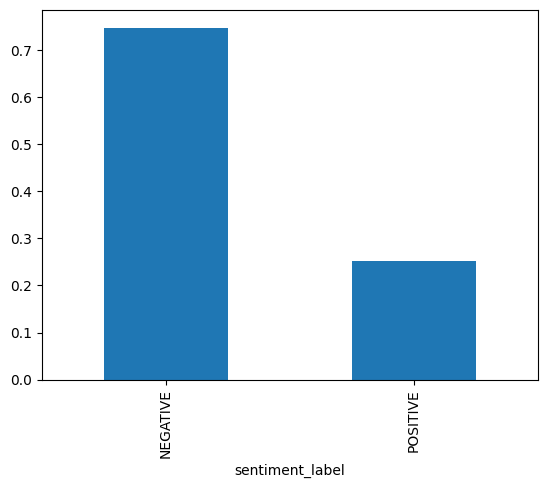

In [13]:
df['sentiment_label'].value_counts(normalize=True).plot(kind='bar')

In [14]:
from collections import Counter
from nltk.corpus import stopwords
import re
import nltk

nltk.download('stopwords')

stop = set(stopwords.words('english'))
words = []
for text in df['comment_body']:
    words += [w.lower() for w in re.findall(r'\b\w+\b', text) if w.lower() not in stop]
Counter(words).most_common(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('pro', 8341),
 ('phone', 6892),
 ('iphone', 6523),
 ('like', 5799),
 ('apple', 5778),
 ('17', 3951),
 ('would', 3899),
 ('get', 3610),
 ('people', 3558),
 ('one', 3541),
 ('battery', 3462),
 ('camera', 2896),
 ('new', 2814),
 ('still', 2706),
 ('even', 2626),
 ('use', 2534),
 ('think', 2438),
 ('max', 2381),
 ('really', 2219),
 ('time', 2204)]

/tmp/ipython-input-3310116479.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette='coolwarm')


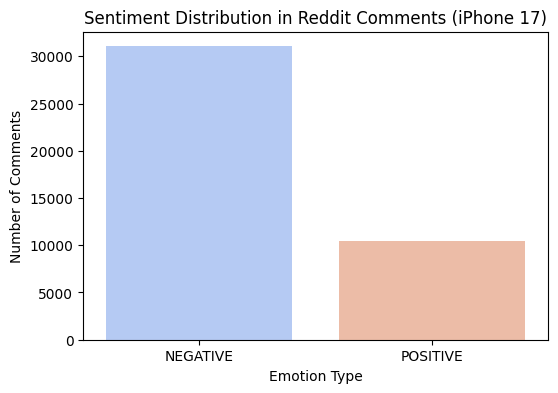

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment_label', palette='coolwarm')
plt.title('Sentiment Distribution in Reddit Comments (iPhone 17)')
plt.xlabel('Emotion Type')
plt.ylabel('Number of Comments')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


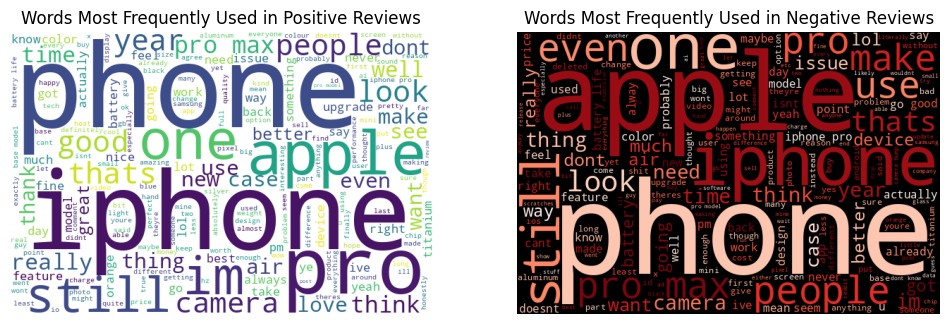

In [16]:
from wordcloud import WordCloud
import nltk, re
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|[^A-Za-z\s]', '', str(text))
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return ' '.join(words)

# Pozitif ve negatif yorumları ayır
positive_text = ' '.join(df[df['sentiment_label'] == 'POSITIVE']['comment_body'].apply(clean_text))
negative_text = ' '.join(df[df['sentiment_label'] == 'NEGATIVE']['comment_body'].apply(clean_text))

# WordCloud oluştur
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(positive_text))
plt.title('Words Most Frequently Used in Positive Reviews')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(negative_text))
plt.title('Words Most Frequently Used in Negative Reviews')
plt.axis('off')
plt.show()


In [17]:
from collections import Counter

def get_top_words(text_series, n=20):
    words = []
    for text in text_series:
        words += clean_text(text).split()
    return Counter(words).most_common(n)

print("Words Most Frequently Used in Positive Reviews:")
print(get_top_words(df[df['sentiment_label']=='POSITIVE']['comment_body']))

print("\nWords Most Frequently Used in Negative Reviews:")
print(get_top_words(df[df['sentiment_label']=='NEGATIVE']['comment_body']))


Words Most Frequently Used in Positive Reviews:
[('pro', 1959), ('iphone', 1355), ('like', 1320), ('im', 1092), ('phone', 1044), ('apple', 945), ('good', 777), ('dont', 765), ('one', 755), ('people', 719), ('still', 681), ('get', 632), ('battery', 631), ('new', 616), ('would', 585), ('think', 584), ('thats', 568), ('camera', 561), ('really', 545), ('max', 545)]

Words Most Frequently Used in Negative Reviews:
[('pro', 6293), ('phone', 5756), ('iphone', 4964), ('like', 4445), ('apple', 4284), ('dont', 3442), ('im', 3234), ('would', 3203), ('get', 2973), ('people', 2791), ('battery', 2785), ('one', 2720), ('camera', 2287), ('even', 2182), ('new', 2169), ('use', 2032), ('still', 2021), ('think', 1852), ('max', 1754), ('time', 1710)]


In [18]:
top_comments = df.sort_values(by='comment_score', ascending=False).head(10)[['comment_body','sentiment_label','comment_score']]
top_comments


,comment_body,sentiment_label,comment_score
19981,dude is the most product testing looking produ...,POSITIVE,8411
38686,I doubt anyone with enough disposable income t...,NEGATIVE,7633
38685,And that is whys stuff like SmartFridges will ...,NEGATIVE,5745
19001,It will be worth more on ebay. Thats for sure....,NEGATIVE,4796
39216,This is message to ALL Comcast users: I have n...,NEGATIVE,4422
38684,"From the article: ""sales are thought to be ecl...",NEGATIVE,4282
0,https://preview.redd.it/w3yrzd32u6of1.jpeg?wid...,NEGATIVE,4110
18998,Close enough: welcome back Product RED.,POSITIVE,4092
39331,"I've decided to institute an ""upvote all Comca...",NEGATIVE,3860
5093,Can i enjoy my 16 pro max for half a day befor...,POSITIVE,3562
